In [ ]:
Useful Links

https://www.doh.wa.gov/DataandStatisticalReports/HealthDataVisualization/SchoolImmunization
https://www.k12.wa.us/data-reporting/data-portal
https://data.wa.gov/browse  This is where I found the huge race dataset
https://data.wa.gov/Education/Report-Card-Enrollment-from-2014-15-to-Current-Yea/rxjk-6ieq - All of the enrollment data

In [1]:
%matplotlib inline
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from data_prep import *


plt.style.use('ggplot')

In [12]:
all45 = read_vaccine_data('data/2014_15_All_Grades')
k45 = read_vaccine_data('data/2014_15_Kindergarten')
six45 = read_vaccine_data('data/2014_15_6th_Grade')
all56 = read_vaccine_data('data/2015_16_All_Grades')
k56 = read_vaccine_data('data/2015_16_Kindergarten')
six56 = read_vaccine_data('data/2015_16_6th_Grade')
all67 = read_vaccine_data('data/2016_17_All_Grades')
k67 = read_vaccine_data('data/2016_17_Kindergarten')
six67 = read_vaccine_data('data/2016_17_6th_Grade')
all_demographic_data = read_demographic_data('data/Report_Card_Enrollment_from_2014-15_to_Current_Year.csv')

In [10]:
k45.columns

Index(['School_Year', 'Enrollment', 'Percent_complete_for_all_immunizations',
       'Percent_conditional', 'Percent_out_of_compliance',
       'Percent_with_any_exemption', 'Percent_with_medical_exemption',
       'Percent_with_personal_exemption', 'Percent_with_religious_exemption',
       'Percent_with_religious_membership_exemption',
       'Percent_complete_for_diphtheria_tetanus',
       'Percent_complete_for_pertussis',
       'Percent_complete_for_measles_mumps_rubella',
       'Percent_complete_for_polio', 'Percent_complete_for_HepatitisB',
       'Percent_complete_for_varicella',
       'Number_complete_for_all_immunizations', 'Number_conditional',
       'Number_out_of_compliance', 'Number_with_any_exemption',
       'Number_with_medical_exemption', 'Number_with_personal_exemption',
       'Number_with_religious_exemption',
       'Number_with_religious_membership_exemption',
       'Number_incomplete_for_diphtheria_tetanus',
       'Number_incomplete_for_pertussis',
       

In [13]:
demographics45 = all_demographic_data[(all_demographic_data['SchoolYear'] == '2014-15') & (all_demographic_data['OrganizationLevel'] == 'School')].copy()
demographics56 = all_demographic_data[(all_demographic_data['SchoolYear'] == '2015-16') & (all_demographic_data['OrganizationLevel'] == 'School')].copy()
demographics67 = all_demographic_data[(all_demographic_data['SchoolYear'] == '2016-17') & (all_demographic_data['OrganizationLevel'] == 'School')].copy()

demographics45['Gradelevel'].unique()

array(['1st Grade', '2nd Grade', '3rd Grade', '4th Grade', '5th Grade',
       '6th Grade', 'Full Day Kindergarten', 'Pre-Kindergarten',
       '10th Grade', '11th Grade', '12th Grade', '7th Grade', '8th Grade',
       '9th Grade', 'Half Day Kindergarten'], dtype=object)

In [105]:
all_demographic_data.columns

Index(['SchoolYear', 'OrganizationLevel', 'County', 'ESDName',
       'CurrentSchoolType', 'Gradelevel', 'All Students', 'Female', 'Male',
       'Gender X', 'American Indian/ Alaskan Native', 'Asian',
       'Black/ African American', 'Hispanic/ Latino of any race(s)',
       'Native Hawaiian/ Other Pacific Islander', 'Two or More Races', 'White',
       'English Language Learners', 'Foster Care', 'Homeless', 'Low-Income',
       'Migrant', 'Military Parent', 'Mobile', 'Section 504',
       'Students with Disabilities', 'Non-English Language Learners',
       'Non-Foster Care', 'Non-Homeless', 'Non-Low Income', 'Non Migrant',
       'Non Military Parent', 'Non Mobile', 'Non Section 504',
       'Students without Disabilities'],
      dtype='object')

In [14]:
kindergarten45 = all_kindergarten(demographics45)
kindergarten45 = convert_to_fractions(kindergarten45)
kindergarten56 = all_kindergarten(demographics56)
kindergarten56 = convert_to_fractions(kindergarten56)
kindergarten67 = all_kindergarten(demographics67)
kindergarten67 = convert_to_fractions(kindergarten67)

In [15]:
six45 = all_sixth(demographics45)
six45 = convert_to_fractions(six45)
six56 = all_sixth(demographics56)
six56 = convert_to_fractions(six56)
six67 = all_sixth(demographics67)
six67 = convert_to_fractions(six67)

In [25]:
k45.head(10)

School_Year  Enrollment  \
School_District           School_Name                                         
ABERDEEN SCHOOL DISTRICT  A J WEST ELEMENTARY           2014-15        72.0   
                          CENTRAL PARK ELEMENTARY       2014-15        25.0   
                          MCDERMOTH ELEMENTARY          2014-15        51.0   
                          ROBERT GRAY ELEMENTARY        2014-15        49.0   
                          ST. MARY SCHOOL               2014-15        11.0   
                          STEVENS ELEMENTARY SCHOOL     2014-15        67.0   
ADNA SCHOOL DISTRICT      ADNA ELEMENTARY SCHOOL        2014-15        41.0   
ALMIRA SCHOOL DISTRICT    ALMIRA ELEMENTARY SCHOOL      2014-15         8.0   
ANACORTES SCHOOL DISTRICT FIDALGO ELEMENTARY            2014-15        50.0   
                          ISLAND VIEW ELEMENTARY        2014-15        24.0   

                                                     Percent_complete_for_all_immunizations  \
School_District           School_Name                                                         
ABERDEEN SCHOOL DISTRICT  A J WEST ELEMENTARY                                          90.3   
                          CENTRAL PARK ELEMENTARY                                      88.0   
                          MCDERMOTH ELEMENTARY                                         94.1   
                          ROBERT GRAY ELEMENTARY                                       91.8   
                          ST. MARY SCHOOL                                              90.9   
                          STEVENS ELEMENTARY SCHOOL                                    86.6   
ADNA SCHOOL DISTRICT      ADNA ELEMENTARY SCHOOL                                       95.1   
ALMIRA SCHOOL DISTRICT    ALMIRA ELEMENTARY SCHOOL                                     75.0   
ANACORTES SCHOOL DISTRICT FIDALGO ELEMENTARY                                           94.0   
                          ISLAND VIEW ELEMENTARY                                       87.5   

                                                     Percent_conditional  \
School_District           School_Name                                      
ABERDEEN SCHOOL DISTRICT  A J WEST ELEMENTARY                        9.7   
                          CENTRAL PARK ELEMENTARY                    8.0   
                          MCDERMOTH ELEMENTARY                       3.9   
                          ROBERT GRAY ELEMENTARY                     8.2   
                          ST. MARY SCHOOL                            0.0   
                          STEVENS ELEMENTARY SCHOOL                 13.4   
ADNA SCHOOL DISTRICT      ADNA ELEMENTARY SCHOOL                     0.0   
ALMIRA SCHOOL DISTRICT    ALMIRA ELEMENTARY SCHOOL                   0.0   
ANACORTES SCHOOL DISTRICT FIDALGO ELEMENTARY                         4.0   
                          ISLAND VIEW ELEMENTARY                    12.5   

                                                     Percent_out_of_compliance  \
School_District           School_Name                                            
ABERDEEN SCHOOL DISTRICT  A J WEST ELEMENTARY                              0.0   
                          CENTRAL PARK ELEMENTARY                          0.0   
                          MCDERMOTH ELEMENTARY                             0.0   
                          ROBERT GRAY ELEMENTARY                           0.0   
                          ST. MARY SCHOOL                                  9.1   
                          STEVENS ELEMENTARY SCHOOL                        0.0   
ADNA SCHOOL DISTRICT      ADNA ELEMENTARY SCHOOL                           2.4   
ALMIRA SCHOOL DISTRICT    ALMIRA ELEMENTARY SCHOOL                         0.0   
ANACORTES SCHOOL DISTRICT FIDALGO ELEMENTARY                               0.0   
                          ISLAND VIEW ELEMENTARY                           0.0   

                                                     Percent_wit

In [16]:
merged_kindergarten_data_45 = pd.merge(k45,kindergarten45, how='left',left_index=True, right_index=True)
merged_kindergarten_data_56 = pd.merge(k56,kindergarten56, how='left',left_index=True, right_index=True)
merged_kindergarten_data_67 = pd.merge(k67,kindergarten67, how='left',left_index=True, right_index=True)
merged_sixth_data_45 = pd.merge(k45,kindergarten45, how='left',left_index=True, right_index=True)
merged_sixth_data_56 = pd.merge(k56,kindergarten56, how='left',left_index=True, right_index=True)
merged_sixth_data_67 = pd.merge(k67,kindergarten67, how='left',left_index=True, right_index=True)
merged_sixth_data_45.columns

Index(['School_Year', 'Enrollment', 'Percent_complete_for_all_immunizations',
       'Percent_conditional', 'Percent_out_of_compliance',
       'Percent_with_any_exemption', 'Percent_with_medical_exemption',
       'Percent_with_personal_exemption', 'Percent_with_religious_exemption',
       'Percent_with_religious_membership_exemption',
       'Percent_complete_for_diphtheria_tetanus',
       'Percent_complete_for_pertussis',
       'Percent_complete_for_measles_mumps_rubella',
       'Percent_complete_for_polio', 'Percent_complete_for_HepatitisB',
       'Percent_complete_for_varicella',
       'Number_complete_for_all_immunizations', 'Number_conditional',
       'Number_out_of_compliance', 'Number_with_any_exemption',
       'Number_with_medical_exemption', 'Number_with_personal_exemption',
       'Number_with_religious_exemption',
       'Number_with_religious_membership_exemption',
       'Number_incomplete_for_diphtheria_tetanus',
       'Number_incomplete_for_pertussis',
       

In [ ]:
#pd.plotting.scatter_matrix(merged_data_45, alpha=0.5, figsize=(12, 12), diagonal='kde')

In [9]:
datasets_list = [merged_kindergarten_data_45, merged_kindergarten_data_56, merged_kindergarten_data_67, merged_sixth_data_45, merged_sixth_data_56, merged_sixth_data_67]

stat,p = stats.wilcoxon(merged_kindergarten_data_45['Asian'],merged_kindergarten_data_45['American Indian/ Alaskan Native'])
stat,p

(31316.5, 4.164933402259468e-158)

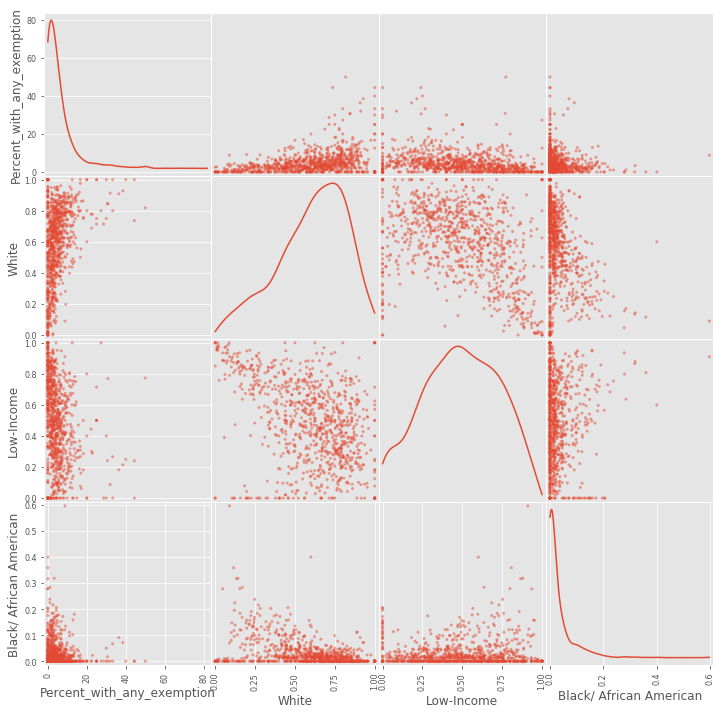

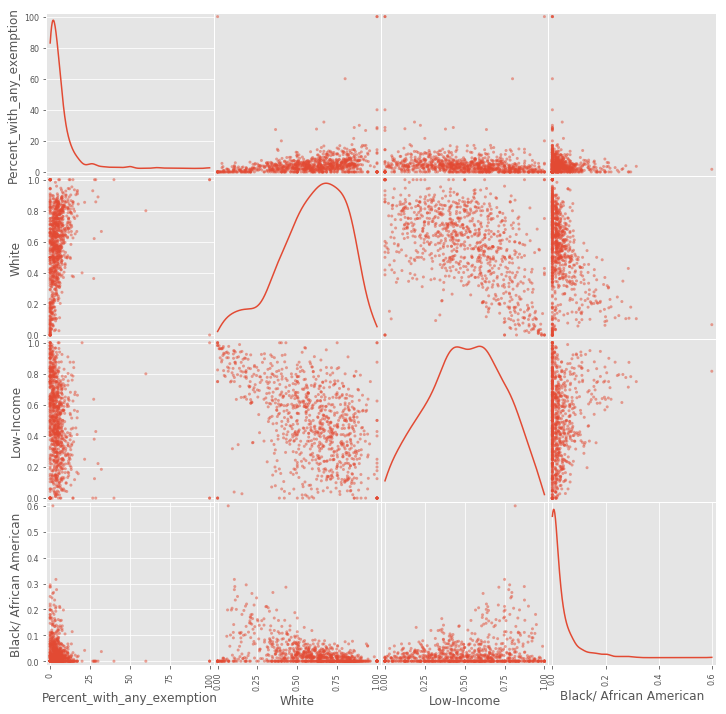

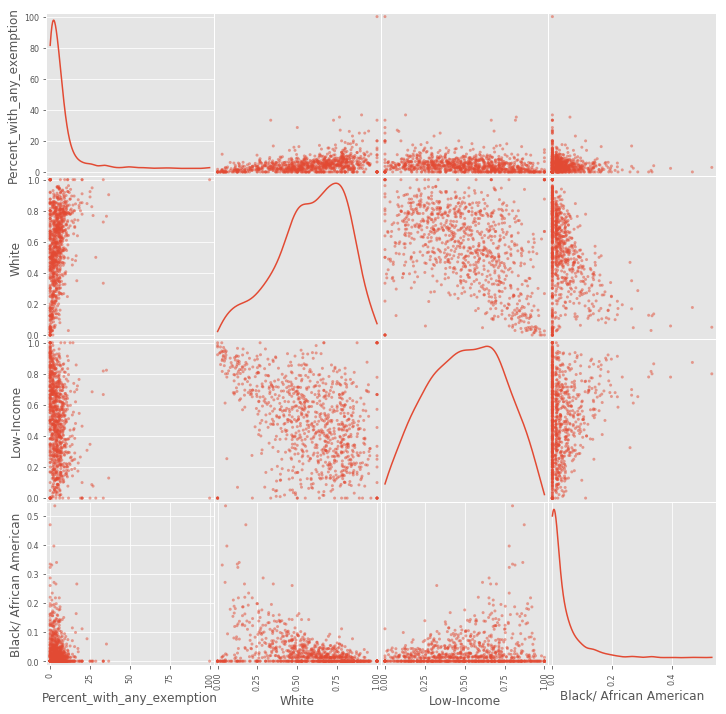

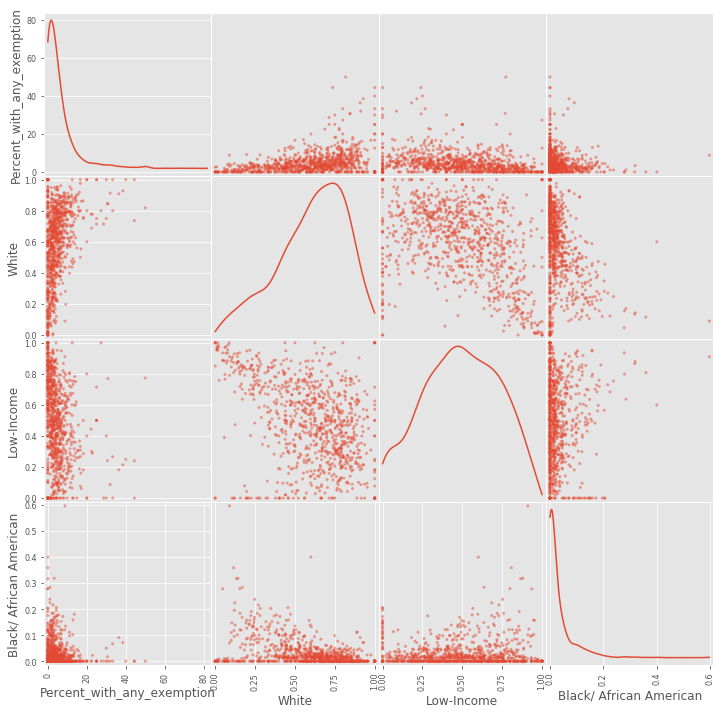

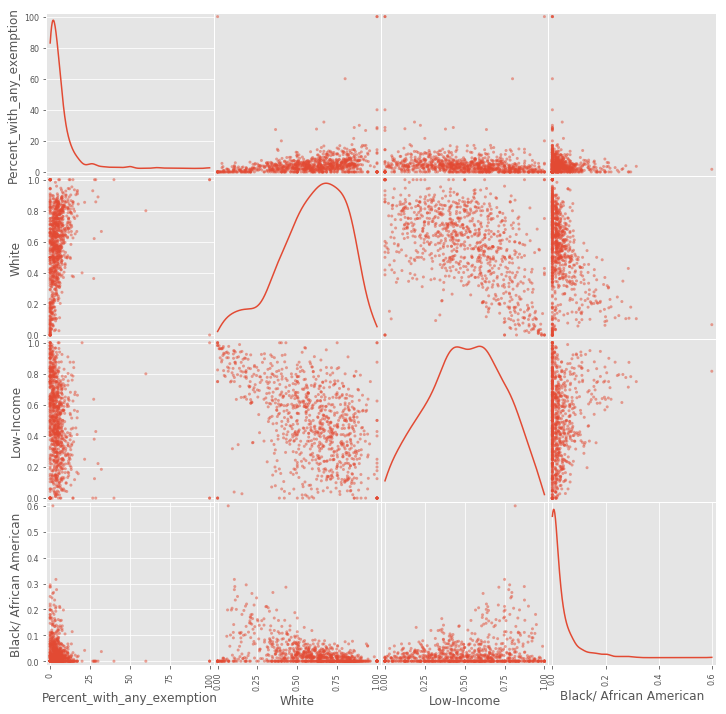

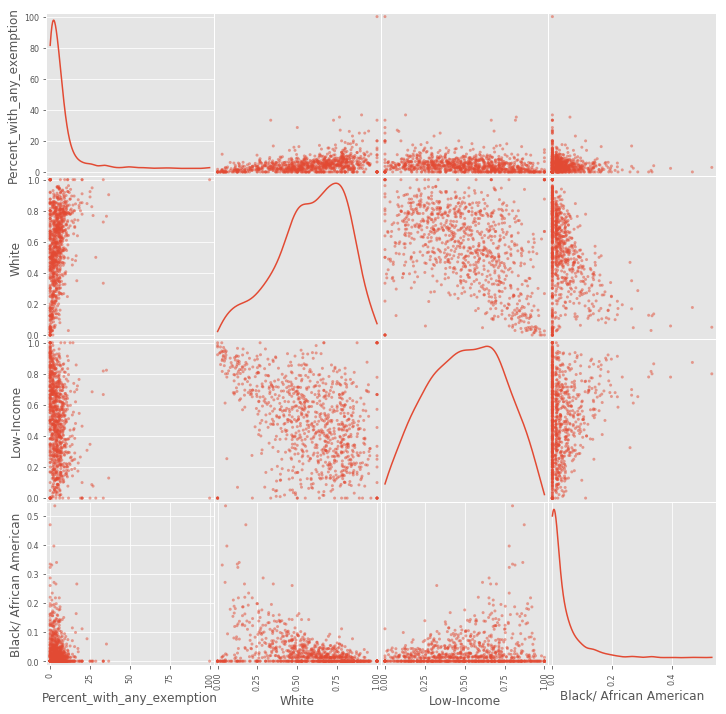

In [386]:
datasets_list = [merged_kindergarten_data_45, merged_kindergarten_data_56, merged_kindergarten_data_67, merged_sixth_data_45, merged_sixth_data_56, merged_sixth_data_67]


for data in datasets_list:
    pd.plotting.scatter_matrix(data[['Percent_with_any_exemption','White','Low-Income','Black/ African American']], alpha=0.5, figsize=(12, 12), diagonal='kde')

In [13]:
merged_data_45[['Percent_with_any_exemption','White','Low-Income','Migrant']]

Percent_with_any_exemption  \
School_District                School_Name                                                                   
ABERDEEN SCHOOL DISTRICT       A J WEST ELEMENTARY                                                     0.0   
                               CENTRAL PARK ELEMENTARY                                                 4.0   
                               MCDERMOTH ELEMENTARY                                                    2.0   
                               ROBERT GRAY ELEMENTARY                                                  0.0   
                               ST. MARY SCHOOL                                                         0.0   
                               STEVENS ELEMENTARY SCHOOL                                               0.0   
ADNA SCHOOL DISTRICT           ADNA ELEMENTARY SCHOOL                                                  2.4   
ALMIRA SCHOOL DISTRICT         ALMIRA ELEMENTARY SCHOOL                                               25.0   
ANACORTES SCHOOL DISTRICT      FIDALGO ELEMENTARY                                                      2.0   
                               ISLAND VIEW ELEMENTARY                                                  0.0   
                               MOUNT ERIE ELEMENTARY                                                  12.0   
                               WHITNEY ELEMENTARY                                                      4.0   
ARLINGTON SCHOOL DISTRICT      ACADEMY NW/FAMILY ACADEMY                                               0.0   
                               EAGLE CREEK ELEMENTARY                                                 13.4   
                               HIGHLAND CHRISTIAN SCHOOLS                                             16.7   
                               KENT PRAIRIE ELEMENTARY                                                 7.8   
                               PIONEER ELEMENTARY                                                      7.1   
                               PRESIDENTS ELEMENTARY                                                   6.3   
ASOTIN-ANATONE SCHOOL DISTRICT ASOTIN ELEMENTARY                                                      12.1   
AUBURN SCHOOL DISTRICT         ALPAC ELEMENTARY SCHOOL                                                 7.6   
                               ARTHUR JACOBSEN ELEMENTARY                                              4.2   
                               BUENA VISTA SDA SCHOOL                                                 18.2   
                               CHINOOK ELEMENTARY SCHOOL                                               0.0   
                               DICK SCOBEE ELEMENTARY SCHOOL                                           2.8   
                               EVERGREEN HEIGHTS ELEMENTARY                                            2.9   
                               GILDO REY ELEMENTARY SCHOOL                                             2.5   
                               GREEN RIVER MONTESSORI SCHOOL                                           0.0   
                               HAZELWOOD ELEMENTARY SCHOOL                                             5.7   
                               HOLY FAMILY SCHOOL                                                      0.0   
                               ILALKO ELEMENTARY SCHOOL                                                1.9   
...                                                                                                    ...   
WISHRAM SCHOOL DISTRICT        WISHRAM HIGH AND ELEMENTARY SCHL                                        0.0   
WOODLAND SCHOOL DISTRICT       LEWIS RIVER ACADEMY                                                     0.0   
                               WOODLAND PRIMARY                                                        8.5   
                               YALE ELEMENTARY                                                         0.0   
YAKIMA SCH

In [19]:
demographics45.info()
race_numbers_columns = ['District Name', 'School Name', 'Total', 'Hispanic / Latino of any race(s)', 'American Indian / Alaskan Native', 'Asian', 
                'Black / African American', 'Native Hawaiian / Other Pacific Islander', 'White', 'Two or More Races']
race_percentage_columns = ['District Name Lower', 'School Name Lower', 'District Name', 'School Name', 'Total', '% Hispanic / Latino of any race(s)', '% American Indian / Alaskan Native', '% Asian', 
                           '% Black / African American', '% Native Hawaiian / Other Pacific Islander', '% White', '% Two or More Races']
demographics45['District Name Lower'] = demographics45['District Name'].str.lower()
demographics45['School Name Lower'] = demographics45['School Name'].str.lower()
demographics45_percentage = demographics45[race_percentage_columns].copy()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13472 entries, (ABERDEEN SCHOOL DISTRICT, A J WEST ELEMENTARY) to (ZILLAH SCHOOL DISTRICT, ZILLAH MIDDLE SCHOOL)
Data columns (total 35 columns):
SchoolYear                                 13472 non-null object
OrganizationLevel                          13472 non-null object
County                                     13472 non-null object
ESDName                                    13309 non-null object
CurrentSchoolType                          13472 non-null object
Gradelevel                                 13472 non-null object
All Students                               13472 non-null int64
Female                                     12700 non-null float64
Male                                       13061 non-null float64
Gender X                                   0 non-null float64
American Indian/ Alaskan Native            4916 non-null float64
Asian                                      7482 non-null float64
Black/ African American   

KeyError: 'District Name'

In [ ]:
columns_percent_all45 = ['School_Name', 'School_District', 'K_12_enrollment', 'Percent_with_any_exemption', 'Percent_with_medical_exemption', 'Percent_with_personal_exemption', 'Percent_with_religious_exemption']
all45[all45['Percent_with_any_exemption'] == 0].sort_values('K_12_enrollment', ascending=False)

In [185]:
k45['District Name Lower'] = k45['School_District'].str.lower()
k45['School Name Lower'] = k45['School_Name'].str.lower()
columns_percent_k45 = ['District Name Lower', 'School Name Lower', 'School_Name', 'School_District', 'City', 'County', 'Reported_enrollment', 'Percent_complete_for_all_immunizations', 
                       'Percent_conditional', 'Percent_out_of_compliance', 'Percent_with_any_exemption', 'Percent_with_medical_exemption', 'Percent_with_personal_exemption', 'Percent_with_religious_exemption']
k45_percentage = k45[(k45['Percent_with_any_exemption'] != 0) & (k45['Reported_enrollment'] > 0 )][columns_percent_k45].sort_values('Reported_enrollment', ascending=False)

In [186]:
k45_percentage.set_index(['District Name Lower', 'School Name Lower'], inplace=True)

In [ ]:
race45_percentage.set_index(['District Name Lower', 'School Name Lower'], inplace=True)

In [205]:
merge45 = pd.merge(k45_percentage,race45_percentage, how='left',left_index=True, right_index=True)
full_merge = merge45[merge45['District Name'].isna()==False]
full_merge.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 826 entries, (sunnyside school district, sun valley elementary) to (great northern school district, great northern elementary)
Data columns (total 22 columns):
School_Name                                   826 non-null object
School_District                               826 non-null object
City                                          826 non-null object
County                                        826 non-null object
Reported_enrollment                           826 non-null float64
Percent_complete_for_all_immunizations        826 non-null float64
Percent_conditional                           826 non-null float64
Percent_out_of_compliance                     826 non-null float64
Percent_with_any_exemption                    826 non-null float64
Percent_with_medical_exemption                826 non-null float64
Percent_with_personal_exemption               826 non-null float64
Percent_with_religious_exemption              826 non-nul

In [20]:
# full_merge.info()
test_full_merge = full_merge[['% White', 'Percent_with_any_exemption']]
# print(test_full_merge)
fig, ax = plt.subplots(1, figsize=(12,12))
ax.scatter(full_merge['% White'], full_merge['Percent_with_any_exemption'], alpha=0.4, s=full_merge['Reported_enrollment']*2)
ax.set_xlabel('% Students that are white')
ax.set_ylabel('% Students with any exception');

NameError: name 'full_merge' is not defined

In [ ]:
pd.plotting.scatter_matrix(full_merge, alpha=0.5, figsize=(12, 12), diagonal='kde')

In [53]:
district45['Number_with_any_exemption'].sum()

57723.0

In [164]:
district45.sort_values('Percent_Exempt', ascending=False)

NameError: name 'district45' is not defined

NameError: name 'district45' is not defined

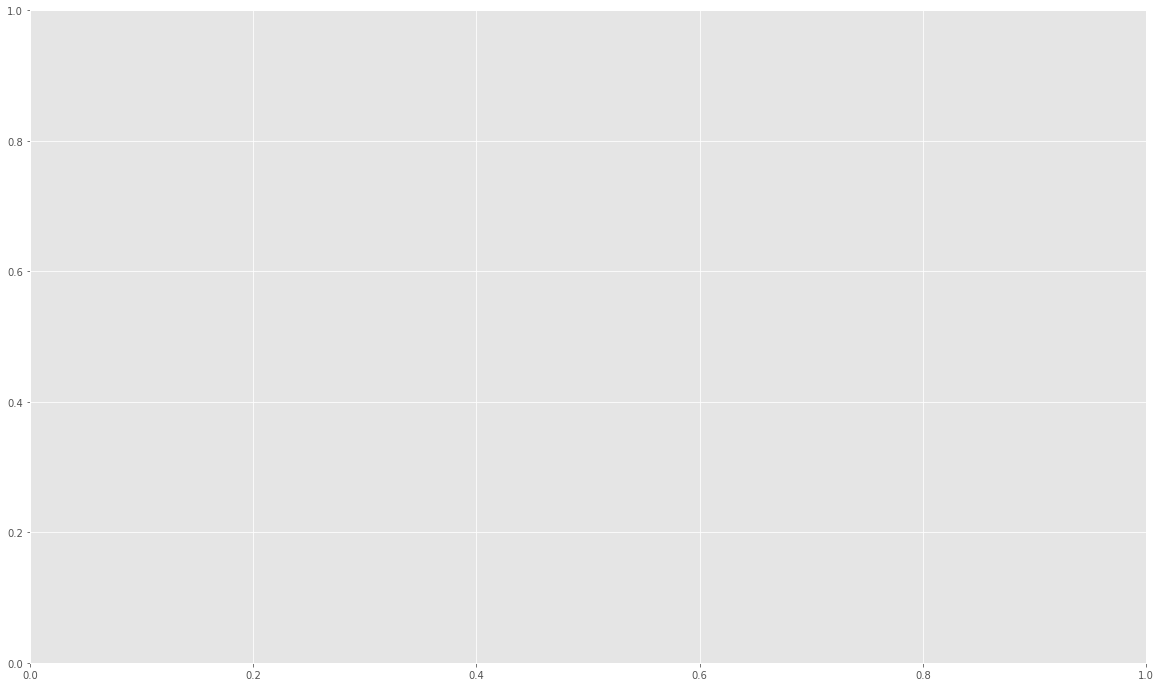

In [21]:
fig, ax = plt.subplots(1,figsize=(20,12))
ax.scatter(district45['K_12_enrollment'], district45['Percent_Exempt'], alpha = .5)

In [236]:
all45[all45['School_District'] == 'LAMONT SCHOOL DISTRICT']

,School_year,K_12_enrollment,Percent_complete_for_all_immunizations,Percent_with_any_exemption,Percent_with_medical_exemption,Percent_with_personal_exemption,Percent_with_religious_exemption,Percent_with_religious_membership_exemption,Percent_exempt_for_diphtheria_tetanus,Percent_exempt_for_pertussis,...,Number_exempt_for_varicella,Reported,Address,City,School_District,County,ESD,Grade_Levels,Has_kindergarten,Has_6thGrade
School_Name,,,,,,,,,,,,,,,,,,,,,
LAMONT MIDDLE SCHOOL,2014-15,32.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,602 MAIN STREET,LAMONT,LAMONT SCHOOL DISTRICT,WHITMAN,EDUCATIONAL SERVICE DISTRICT 101,5-8,N,Y


In [27]:
ESD45['Percent_Exempt'] = ESD45['Number_with_any_exemption']/ESD45['K_12_enrollment']*100

In [28]:
ESD45.sort_values('Percent_Exempt', ascending=False)

,K_12_enrollment,Number_with_any_exemption,Percent_Exempt
ESD,,,
EDUCATIONAL SERVICE DISTRICT 101,98160.0,6992.0,7.123064
NORTHWEST EDUCATIONAL SERVICE DISTRICT 189,168131.0,11180.0,6.649577
EDUCATIONAL SERVICE DISTRICT 112,102554.0,6581.0,6.417107
EDUCATIONAL SERVICE DISTRICT 113,71104.0,3861.0,5.430074
OLYMPIC EDUCATIONAL SERVICE DISTRICT 114,42310.0,2239.0,5.291893
PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121,444601.0,22370.0,5.031478
NORTH CENTRAL EDUCATIONAL SERVICE DISTRICT 171,42739.0,1509.0,3.530733
EDUCATIONAL SERVICE DISTRICT 123,71491.0,2051.0,2.868893
EDUCATIONAL SERVICE DISTRICT 105,63280.0,940.0,1.485461


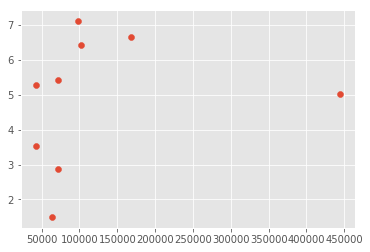

In [29]:
plt.scatter(ESD45['K_12_enrollment'], ESD45['Percent_Exempt'])

In [ ]:
fig, ax = plt.subplots(12,12)
pd.plotting.scatter_matrix(all45, alpha=0.5, figsize=(12, 12), diagonal='kde')

In [257]:
aaa = pd.read_csv('data/K_and_6_Immunization_2017-8.csv')
aaa['Category'].unique()
aaa_interesting_list = ['School District', 'School Name', 'Category', 'City', 'Count', 'County',
       'ESD', 'Enroll Text', 'Enrollment', 'Grade', 'Number of Records', 'Percent', 'Percent Value', 'Reliable',
       'Reported', 'Type']
aaa.columns

Index(['Address', 'Bldg No', 'exemptVSincomplete', 'School Type',
       'Total Geogs', 'Category', 'City', 'Count', 'County', 'District Name',
       'ESD', 'Enroll Text', 'Enrollment', 'Geography', 'Grade', 'Group', 'LL',
       'Latitude', 'Longitude', 'Number of Records', 'Percent', 'Reliable',
       'Reported', 'School Name', 'School Year', 'School District', 'State',
       'Type', 'UL', 'Zip', 'Has6', 'Hask'],
      dtype='object')

In [207]:
aaa = aaa[aaa['Enrollment']>0]
aaa['Group'].unique()

array(['Religious', 'Religious Membership', 'Complete', 'Conditional',
       'Diptheria, Tetanus', 'Exempt', 'Hepatitus B', 'MMR', 'Medical',
       'Out of Compliance', 'Personal', 'Pertussis', 'Polio', 'Varicella'],
      dtype=object)

In [191]:
# aaa[aaa['School Name'] == 'Oak Harbor Intermediate School'].head(50)[aaa_interesting_list].sort_values('Category')

In [182]:
aaa_groups = aaa['Group'].copy()
aaa = pd.get_dummies(aaa, columns = ['Group'], prefix='Percent', prefix_sep=' ')

In [208]:
aaa['Percent Value'] = aaa['Percent'].apply(lambda x: float(x.strip('%'))/100)

In [209]:
aaa[aaa_interesting_list].sort_values('Percent Value', ascending=False).head(50)

,School District,School Name,Category,City,Count,County,ESD,Enroll Text,Enrollment,Grade,Number of Records,Percent,Percent Value,Reliable,Reported,Type
1621,Bellingham,Montessori At Samish Woods,Exemption,Bellingham,22,Whatcom,Educational Service District 189,13,13,Kindergarten,1,169.20%,1.692,No,1.0,PRIVATE
2879,Pasco,Mark Twain Elementary,Status,Pasco,111,Franklin,Educational Service District 123,111,111,Sixth Grade,1,100.00%,1.000,Yes,0.0,PUBLIC
472,South Kitsap,Bethany Lutheran Elementary,Status,Port Orchar,16,Kitsap,Educational Service District 114,16,16,Kindergarten,1,100.00%,1.000,No,1.0,PRIVATE
4286,Highline,St Bernadette School,Status,Seattle,18,King,Educational Service District 121,18,18,Kindergarten,1,100.00%,1.000,Yes,1.0,PRIVATE
477,Tacoma,Concordia Christian Academy,Status,Tacoma,12,Pierce,Educational Service District 121,12,12,Kindergarten,1,100.00%,1.000,No,1.0,PRIVATE
2130,Seattle,Epiphany School,Status,Seattle,34,King,Educational Service District 121,34,34,Kindergarten,1,100.00%,1.000,Yes,1.0,PRIVATE
4288,Bellevue,Open Window School,Status,Bellevue,36,King,Educational Service District 121,36,36,Kindergarten,1,100.00%,1.000,Yes,1.0,PRIVATE
485,Snohomish,St Michael Catholic School,Status,Snohomish,14,Snohomish,Educational Service District 189,14,14,Kindergarten,1,100.00%,1.000,No,1.0,PRIVATE
37830,Wilbur,Wilbur Elementary School,Status,Wilbur,21,Lincoln,Educational Service District 101,21,21,Sixth Grade,1,100.00%,1.000,Yes,1.0,PUBLIC
489,Central Valley,Spokane Valley Adventist School,Status,Spokane Val,11,Spokane,Educational Service District 101,11,11,Kindergarten,1,100.00%,1.000,No,1.0,PRIVATE


In [198]:
aaa.columns

Index(['Address', 'Bldg No', 'exemptVSincomplete', 'School Type',
       'Total Geogs', 'Category', 'City', 'Count', 'County', 'District Name',
       'ESD', 'Enroll Text', 'Enrollment', 'Geography', 'Grade', 'Group', 'LL',
       'Latitude', 'Longitude', 'Number of Records', 'Percent', 'Reliable',
       'Reported', 'School Name', 'School Year', 'School District', 'State',
       'Type', 'UL', 'Zip', 'Has6', 'Hask', 'Percent Value'],
      dtype='object')

In [218]:
aaa_group_columns = ['Percent Value',
       'Percent Complete', 'Percent Conditional', 'Percent Diptheria, Tetanus',
       'Percent Exempt', 'Percent Hepatitus B', 'Percent MMR',
       'Percent Medical', 'Percent Out of Compliance', 'Percent Personal',
       'Percent Pertussis', 'Percent Polio', 'Percent Religious',
       'Percent Religious Membership', 'Percent Varicella']

In [200]:
aaa.columns

Index(['Address', 'Bldg No', 'exemptVSincomplete', 'School Type',
       'Total Geogs', 'Category', 'City', 'Count', 'County', 'District Name',
       'ESD', 'Enroll Text', 'Enrollment', 'Geography', 'Grade', 'Group', 'LL',
       'Latitude', 'Longitude', 'Number of Records', 'Percent', 'Reliable',
       'Reported', 'School Name', 'School Year', 'School District', 'State',
       'Type', 'UL', 'Zip', 'Has6', 'Hask', 'Percent Value'],
      dtype='object')

In [287]:
b[b['School Name']=='Anacortes Middle School'].head()

,Address,Bldg No,exemptVSincomplete,School Type,Total Geogs,Category,City,Count,County,District Name,...,Percent Hepatitus B,Percent MMR,Percent Medical,Percent Out of Compliance,Percent Personal,Percent Pertussis,Percent Polio,Percent Religious,Percent Religious Membership,Percent Varicella
2393,2202 M Avenue,2707,incomplete,PUBLIC,2764,Status,Anacortes,185,Skagit,Anacortes,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3212,2202 M Avenue,2707,incomplete,PUBLIC,2764,Status,Anacortes,6,Skagit,Anacortes,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244,2202 M Avenue,2707,incomplete,PUBLIC,2764,Vaccine,Anacortes,15,Skagit,Anacortes,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3278,2202 M Avenue,2707,incomplete,PUBLIC,2764,Status,Anacortes,16,Skagit,Anacortes,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3312,2202 M Avenue,2707,incomplete,PUBLIC,2764,Vaccine,Anacortes,9,Skagit,Anacortes,...,0.043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
b.groupby(['District Name', 'School Name' , 'Grade', 'Enrollment'] ).sum()

Total Geogs  \
District Name  School Name                       Grade        Enrollment                
Aberdeen       A J West Elementary               Kindergarten 59                38696   
                                                 Sixth Grade  53                38696   
               Central Park Elementary           Kindergarten 29                38696   
                                                 Sixth Grade  30                38696   
               Mcdermoth Elementary              Kindergarten 48                38696   
                                                 Sixth Grade  47                38696   
               Robert Gray Elementary Aberdeen   Kindergarten 42                38696   
                                                 Sixth Grade  53                38696   
               St Mary School                    Kindergarten 22                38696   
                                                 Sixth Grade  10                38696   
Almira         Almira Elementary School          Sixth Grade  24                38696   
Anacortes      Anacortes Middle School           Sixth Grade  207               38696   
               Fidalgo Elementary                Kindergarten 40                38696   
               Island View Elementary            Kindergarten 39                38696   
               Mount Erie Elementary             Kindergarten 37                38696   
               Whitney Elementary Anacortes      Kindergarten 94                38696   
Arlington      Eagle Creek Elementary            Kindergarten 109               38696   
               Haller Middle School              Sixth Grade  213               38696   
               Kent Prairie Elementary           Kindergarten 99                38696   
               Pioneer Elementary                Kindergarten 101               35932   
               Post Middle School                Sixth Grade  194               38696   
               Presidents Elementary             Kindergarten 76                38696   
Asotin-Anatone Asotin Elementary                 Kindergarten 33                38696   
               Asotin Jr Sr High                 Sixth Grade  46                38696   
Auburn         Alpac Elementary School           Kindergarten 111               38696   
               Arthur Jacobsen Elementary        Kindergarten 78                38696   
               Buena Vista Sda School            Kindergarten 19                38696   
                                                 Sixth Grade  29                38696   
               Cascade Middle School             Sixth Grade  286               38696   
               Chinook Elementary School         Kindergarten 93                38696   
...                                                                               ...   
Yakima         Gilbert Elementary School         Kindergarten 87                38696   
               Hoover Elementary School          Kindergarten 120               38696   
               Lewis & Clark Middle School       Sixth Grade  309               38696   
               Martin Luther King Jr Elementary  Kindergarten 95                38696   
               Mcclure Elementary School Yakima  Kindergarten 102               38696   
               Mckinley Elementary School        Kindergarten 72                38696   
               Montessori School Of Yakima       Kindergarten 18                38696   
               Nob Hill Elementary School        Kindergarten 80                38696   
               Ridgeview Elementary              Kindergarten 93                38696   
               Robertson Elementary              Kindergarten 104               38696   
               Roosevelt Elementary Yakima       Kindergarten 88                27640   
               St Joseph Marquette Middle School Kindergarten 33                38696   
                                                 Sixth Grade  34     

In [288]:
b.columns

Index(['Address', 'Bldg No', 'exemptVSincomplete', 'School Type',
       'Total Geogs', 'Category', 'City', 'Count', 'County', 'District Name',
       'ESD', 'Enroll Text', 'Enrollment', 'Geography', 'Grade', 'LL',
       'Latitude', 'Longitude', 'Number of Records', 'Percent', 'Reliable',
       'Reported', 'School Name', 'School Year', 'School District', 'State',
       'Type', 'UL', 'Zip', 'Has6', 'Hask', 'Percent Value',
       'Percent Complete', 'Percent Conditional', 'Percent Diptheria, Tetanus',
       'Percent Exempt', 'Percent Hepatitus B', 'Percent MMR',
       'Percent Medical', 'Percent Out of Compliance', 'Percent Personal',
       'Percent Pertussis', 'Percent Polio', 'Percent Religious',
       'Percent Religious Membership', 'Percent Varicella'],
      dtype='object')

In [365]:
bbb = create_columns('data/K_and_6_Immunization_2017-8.csv')

In [366]:
bbb

Reported  \
School_District School_Name                       School Type City      County       ESD                              Enrollment Grade                    
ABERDEEN        A J WEST ELEMENTARY               PUBLIC      Aberdeen  Grays Harbor Educational Service District 113 53         Sixth Grade       14.0   
                                                                                                                      59         Kindergarten      14.0   
                CENTRAL PARK ELEMENTARY           PUBLIC      Aberdeen  Grays Harbor Educational Service District 113 29         Kindergarten      14.0   
                                                                                                                      30         Sixth Grade       14.0   
                MCDERMOTH ELEMENTARY              PUBLIC      Aberdeen  Grays Harbor Educational Service District 113 47         Sixth Grade       14.0   
                                                                                                                      48         Kindergarten      14.0   
                ROBERT GRAY ELEMENTARY ABERDEEN   PUBLIC      Aberdeen  Grays Harbor Educational Service District 113 42         Kindergarten      14.0   
                                                                                                                      53         Sixth Grade       14.0   
                ST MARY SCHOOL                    PRIVATE     Aberdeen  Grays Harbor Educational Service District 113 10         Sixth Grade       14.0   
                                                                                                                      22         Kindergarten      14.0   
ADNA            ADNA ELEMENTARY SCHOOL            PUBLIC      Adna      Lewis        Educational Service District 113 39         Kindergarten      14.0   
ALMIRA          ALMIRA ELEMENTARY SCHOOL          PUBLIC      Almira    Lincoln      Educational Service District 101 24         Sixth Grade       14.0   
ANACORTES       ANACORTES MIDDLE SCHOOL           PUBLIC      Anacortes Skagit       Educational Service District 189 207        Sixth Grade       14.0   
                FIDALGO ELEMENTARY                PUBLIC      Anacortes Skagit       Educational Service District 189 40         Kindergarten      14.0   
                ISLAND VIEW ELEMENTARY            PUBLIC      Anacortes Skagit       Educational Service District 189 39         Kindergarten      14.0   
                MOUNT ERIE ELEMENTARY             PUBLIC      Anacortes Skagit       Educational Service District 189 37         Kindergarten      14.0   
                WHITNEY ELEMENTARY ANACORTES      PUBLIC      Anacortes Skagit       Educational Service District 189 94         Kindergarten      14.0   
ARLINGTON       EAGLE CREEK ELEMENTARY            PUBLIC      Arlington Snohomish    Educational Service District 189 109        Kindergarten      14.0   
                HALLER MIDDLE SCHOOL              PUBLIC      Arlington Snohomish    Educational Service District 189 213        Sixth Grade       14.0   
                KENT PRAIRIE ELEMENTARY           PUBLIC      Arlington Snohomish    Educational Service District 189 99         Kindergarten      14.0   
                PIONEER ELEMENTARY                PUBLIC      Arlington Snohomish    Educational Service District 189 101        Kindergarten      13.0   
                POST MIDDLE SCHOOL                PUBLIC      Arlington Snohomish    Educational Service District 189 194        Sixth Grade       14.0   
                PRESIDENTS ELEMENTARY             PUBLIC      Arlington Snohomish    Educational Service District 189 76         Kindergarten      14.0   
ASOTIN-ANATONE  ASOTIN ELEMENTARY                 PUBLIC      Asotin    Asotin       Educational Service District 123 33         Kindergarten      14.0   
                ASOTIN JR SR HIGH                 PUBLIC      Asotin    Asotin       Educational Service District

In [326]:
zzz = pd.read_csv('data/K_and_6_Immunization_2017-8.csv')['District Name']
zzz

0                   Yakima
1                   Zillah
2                Wenatchee
3                   Sequim
4            Battle Ground
5            Battle Ground
6                    Camas
7        Evergreen (Clark)
8        Evergreen (Clark)
9        Evergreen (Clark)
10               Vancouver
11               Vancouver
12                Woodland
13                Republic
14                   Royal
15                 Wahluke
16                 Ephrata
17               Soap Lake
18               Montesano
19              Oak Harbor
20                  Auburn
21                Bellevue
22                Bellevue
23                Enumclaw
24             Federal Way
25             Federal Way
26             Federal Way
27             Federal Way
28                Highline
29                Issaquah
               ...        
40304      Lake Washington
40305        Mercer Island
40306               Renton
40307               Renton
40308              Seattle
40309              Seattle
4

In [368]:
a = 'Lakota School District'
a.strip('School District')
a

TypeError: strip() takes no keyword arguments